In [1]:
from sparticles_hadhad.rewritten_dataset import EventsDataset
from sparticles_hadhad.rewritten_dataset import DEFAULT_EVENT_SUBSETS
import matplotlib.pyplot as plt
from sparticles_hadhad.transforms import MakeHomogeneous
make_homogeneous_trans = MakeHomogeneous()
from sparticles import plot_event_2d
import os
import errno
import numpy as np
from numpy import pi

In [40]:
#Code block for processing the raw data from the h5 file. These are the h5 files that cut events with pT < 20GeV.

LAMBDA_VAL = 100 #100, 240, 300
lambda_values = 100, 240, 300
lambda_signal = (72380, 74169, 65152)

if LAMBDA_VAL in lambda_values:
    index = lambda_values.index(LAMBDA_VAL)
    selected_signal = lambda_signal[index]

sig_no = 20000 #max lambda100 = 72380, lambda240 = 74169, lambda300 = 65152
ttb_no = 20000 #max = 213475, inclusive max = 48444
vjets_no = 0

if sig_no == ttb_no:
    stats_string = 'balanced_stats'
else:
    stats_string = f'sig_{sig_no}_ttb_{ttb_no}'
    
processed_file = f"/hepstore/{os.environ['USER']}/fcc_hh_data_hadhad_84TeV/processed/events_signal_{sig_no}_ttbar_{ttb_no}_vjets_{vjets_no}.pt"

def remove_processed(filename):
    try:
        os.remove(filename)
    except OSError as e: 
        if e.errno != errno.ENOENT: 
            raise

remove_processed(processed_file)



# with open('means.yaml' ) as f:
#     mean_list_loaded = yaml.load(f, Loader = yaml.Loader)

# with open('std.yaml' ) as g:
#     std_list_loaded = yaml.load(g, Loader = yaml.Loader)



dataset = EventsDataset(
    root= f'/hepstore/{os.environ["USER"]}/fcc_hh_data_hadhad_84TeV',
    url='https://cernbox.cern.ch/s/SpsIy2kRzVZtwnn/download/',
    delete_raw_archive=False,
    add_edge_index=True,
    event_subsets={'signal': sig_no, 'ttbar': ttb_no, 'vjets': vjets_no}, #For the FCC, only ttbar events are used, but the h5 file for background is saved and taken from the 'singletop' file. 
   # transform=MakeHomogeneous(),
    download_type=2,
    signal_filename=f'pwp8_pp_hh_lambda{LAMBDA_VAL}_5f_80TeV_SA_hhbbtata.h5', # Specify the signal filename here
    background_filename='mgp8_pp_tt012j_5f_84TeV_blvblv.h5',
    bb_features = {"m_bb": True, "dEta_bb": False, "dPhi_bb": False, "dR_bb": True},
    tt_features = {"m_tt": True, "dEta_tt": False, "dPhi_tt": False, "dR_tt": True, "dpT_tt": True},
    other_features = {"m_T": True, "C_met": True, "m_HH": True, "dPhi_HH": True},
#    loaded_means = mean_list_loaded, # for the standisation to be the same when applying the kappa_lambda = 1 to the other signal samples.
#    loaded_stds = std_list_loaded
)

Processing...
Processing events in /hepstore/lwood/fcc_hh_data_hadhad_84TeV/raw/signal/pwp8_pp_hh_lambda100_5f_80TeV_SA_hhbbtata.h5: 1
Processing events in /hepstore/lwood/fcc_hh_data_hadhad_84TeV/raw/ttbar/mgp8_pp_tt012j_5f_84TeV_blvblv.h5: 100%|█| 20000
Processing events in /hepstore/lwood/fcc_hh_data_hadhad_84TeV/raw/vjets/mgp8_pp_tt012j_5f_84TeV_blvblv.h5: 0it [00:00, ?it/s]
Done!


In [8]:
print(dataset[0].x)

tensor([[ 2.2723e+02,  3.7239e+00, -1.6464e-01],
        [ 3.8683e+01,  2.9444e+00, -1.9195e-02],
        [ 1.4896e+02,  4.1427e-01,  2.8104e+00],
        [ 8.9418e+01,  6.7929e-01, -2.3911e+00],
        [ 8.3915e+01,         nan, -2.9851e-01],
        [ 1.5643e+02,  1.6181e+00,  2.5185e+00]], dtype=torch.float64)


In [13]:
# complex_store_sig_100 = [g.x[-1] for g in dataset if g.y.item() == 1] 
# complex_store_bkg_100 = [g.x[-1] for g in dataset if g.y.item() == 0]

In [15]:
# complex_store_sig_240 = [g.x[-1] for g in dataset if g.y.item() == 1] 
# complex_store_bkg_240 = [g.x[-1] for g in dataset if g.y.item() == 0]

# Input Distributions

In [41]:
# Tau
tau1_sig = [g.x[0] for g in dataset if g.y.item() == 1]
tau1_bkg = [g.x[0] for g in dataset if g.y.item() == 0]
# print(len(tau_sig), len(tau_bkg))
#print(tau_sig[0])
#print(tau_bkg[0])
# Lepton
tau2_sig = [g.x[1] for g in dataset if g.y.item() == 1]
tau2_bkg = [g.x[1] for g in dataset if g.y.item() == 0]
# b-jet 1
b1_sig = [g.x[2] for g in dataset if g.y.item() == 1]
b1_bkg = [g.x[2] for g in dataset if g.y.item() == 0]
# b-jet 2
b2_sig = [g.x[3] for g in dataset if g.y.item() == 1]
b2_bkg = [g.x[3] for g in dataset if g.y.item() == 0]
# Missing Transverse Energy
energy_sig = [g.x[4] for g in dataset if g.y.item() == 1]
energy_bkg = [g.x[4] for g in dataset if g.y.item() == 0]
# Jet 3
jet3_sig = [g.x[5] for g in dataset if g.y.item() == 1 and g.x.shape == (6,3)]
jet3_bkg = [g.x[5] for g in dataset if g.y.item() == 0 and g.x.shape == (6,3)]

In [10]:
# print(len(jet3_sig)/selected_signal)

0.695606521138436


In [43]:
LEGEND_SIZE = 22
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.figure(figsize=(10, 6))

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

<Figure size 1000x600 with 0 Axes>

## Tau 1

In [44]:
tau1_pt_sig = [h[0] for h in tau1_sig]
tau1_pt_bkg = [h[0] for h in tau1_bkg]
tau1_eta_sig = [h[1] for h in tau1_sig]
tau1_eta_bkg = [h[1] for h in tau1_bkg]
tau1_phi_sig = [h[2] for h in tau1_sig]
tau1_phi_bkg = [h[2] for h in tau1_bkg]

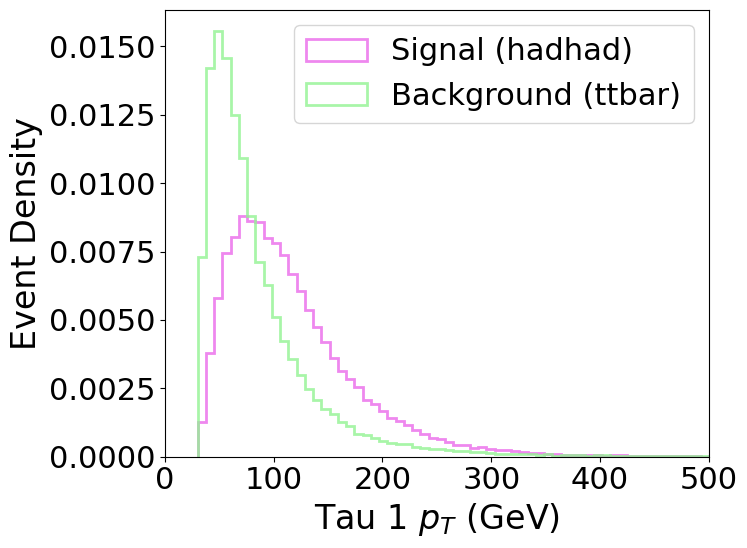

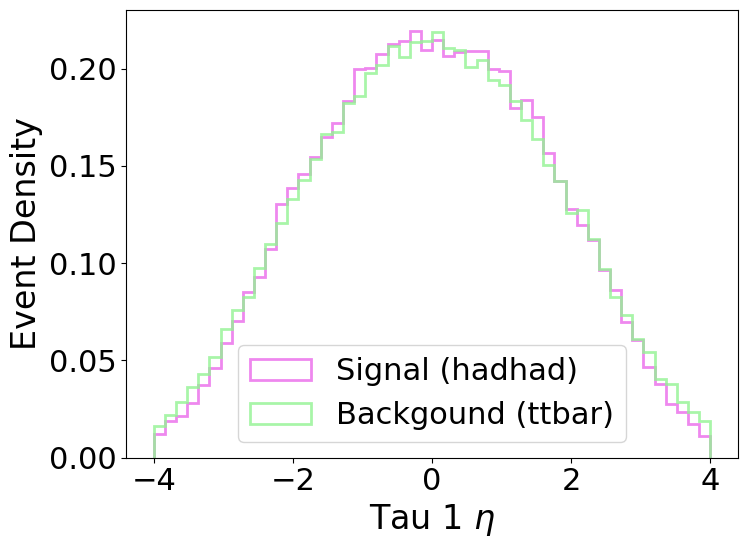

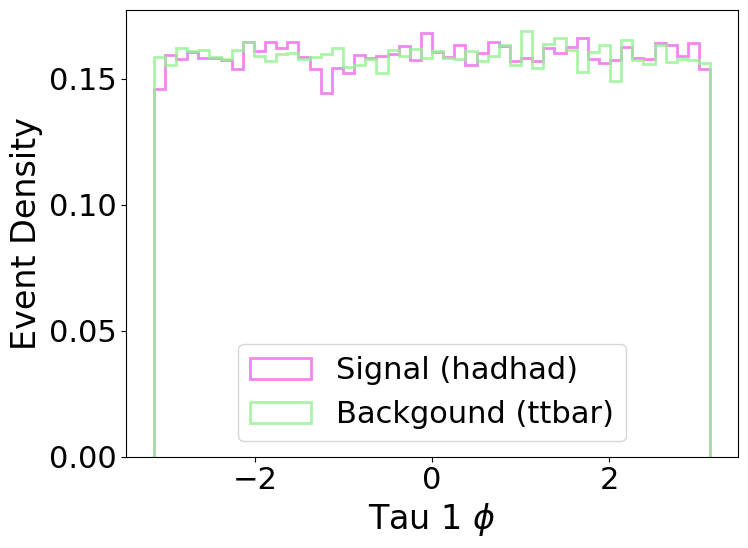

In [64]:
## pT
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((tau1_pt_sig ,tau1_pt_bkg)), bins=300)[1] #get the bin edges
plt.hist(tau1_pt_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(tau1_pt_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Background (ttbar)', density=True, linewidth = 2)
plt.xlim(0,500)
plt.xlabel('Tau 1 $p_T$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/tau1_pt.png')
plt.savefig('Saved Figures/Input Variables/tau1_pt.pdf')
plt.show()
## Eta
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((tau1_eta_sig ,tau1_eta_bkg)), bins=50)[1] #get the bin edges
plt.hist(tau1_eta_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(tau1_eta_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('Tau 1 $\eta$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/tau1_eta.png')
plt.savefig('Saved Figures/Input Variables/tau1_eta.pdf')
plt.show()
## Phi
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((tau1_phi_sig ,tau1_phi_bkg)), bins=50)[1] #get the bin edges
plt.hist(tau1_phi_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(tau1_phi_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('Tau 1 $\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/tau1_phi.png')
plt.savefig('Saved Figures/Input Variables/tau1_phi.pdf')
plt.show()

## Tau 2

In [46]:
tau2_pt_sig = [h[0] for h in tau2_sig]
tau2_pt_bkg = [h[0] for h in tau2_bkg]
tau2_eta_sig = [h[1] for h in tau2_sig]
tau2_eta_bkg = [h[1] for h in tau2_bkg]
tau2_phi_sig = [h[2] for h in tau2_sig]
tau2_phi_bkg = [h[2] for h in tau2_bkg]

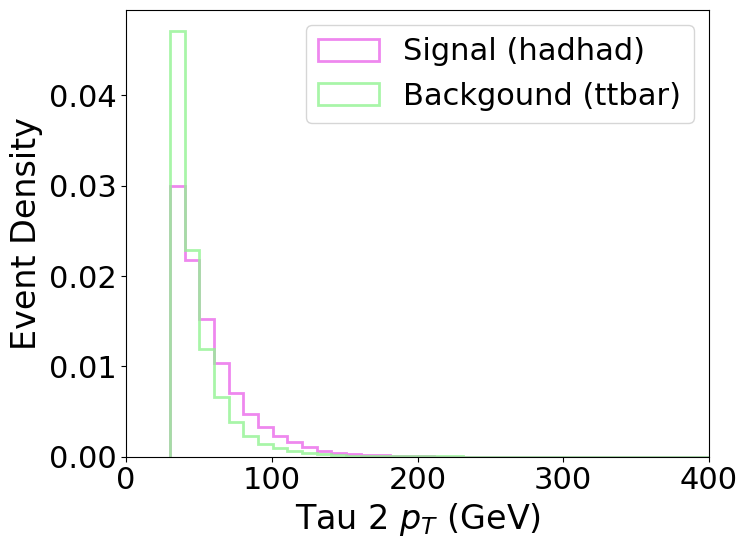

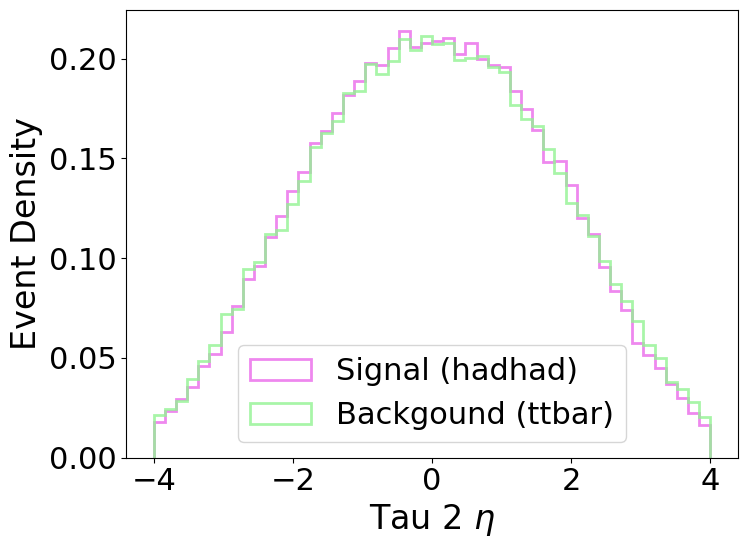

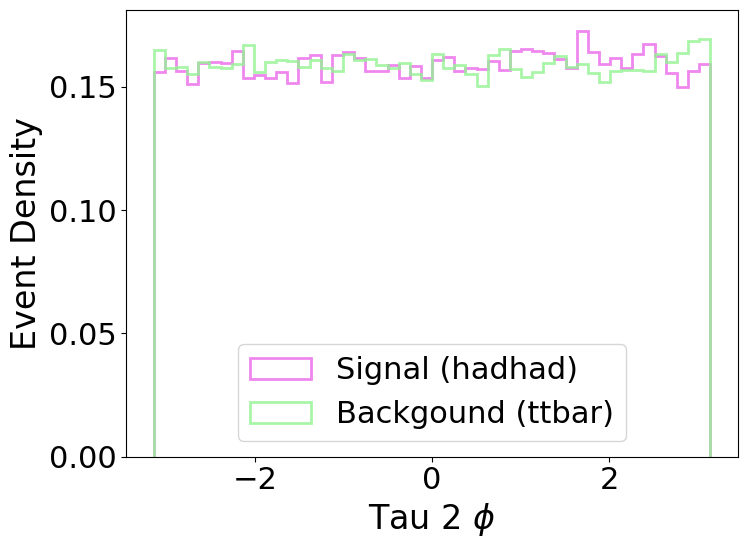

In [65]:
## pT
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((tau2_pt_sig ,tau2_pt_bkg)), bins=100)[1] #get the bin edges
plt.hist(tau2_pt_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(tau2_pt_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.xlim(0,400)
plt.xlabel('Tau 2 $p_T$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/tau2_pt.png')
plt.savefig('Saved Figures/Input Variables/tau2_pt.pdf')
plt.show()
## Eta
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((tau2_eta_sig ,tau2_eta_bkg)), bins=50)[1] #get the bin edges
plt.hist(tau2_eta_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(tau2_eta_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('Tau 2 $\eta$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/tau2_eta.png')
plt.savefig('Saved Figures/Input Variables/tau2_eta.pdf')
plt.show()
## Phi
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((tau2_phi_sig ,tau2_phi_bkg)), bins=50)[1] #get the bin edges
plt.hist(tau2_phi_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(tau2_phi_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('Tau 2 $\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/tau2_phi.png')
plt.savefig('Saved Figures/Input Variables/tau2_phi.pdf')
plt.show()

## b-jet 1

In [52]:
b1_pt_sig = [h[0] for h in b1_sig]
b1_pt_bkg = [h[0] for h in b1_bkg]
b1_eta_sig = [h[1] for h in b1_sig]
b1_eta_bkg = [h[1] for h in b1_bkg]
b1_phi_sig = [h[2] for h in b1_sig]
b1_phi_bkg = [h[2] for h in b1_bkg]

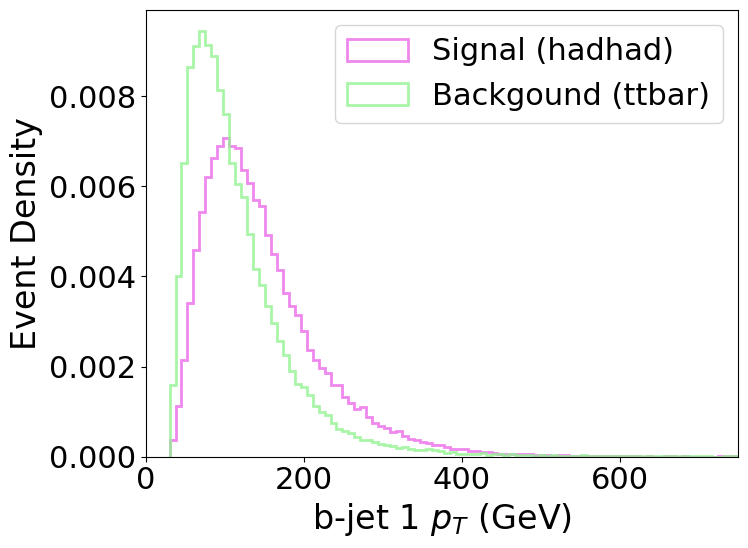

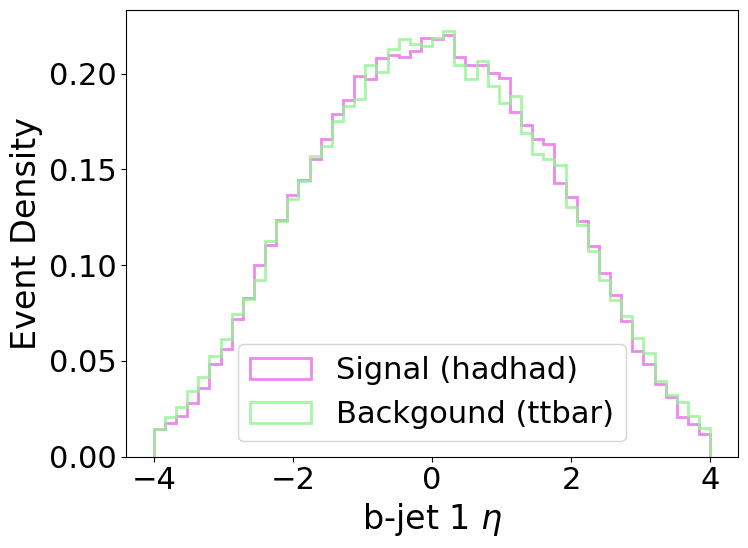

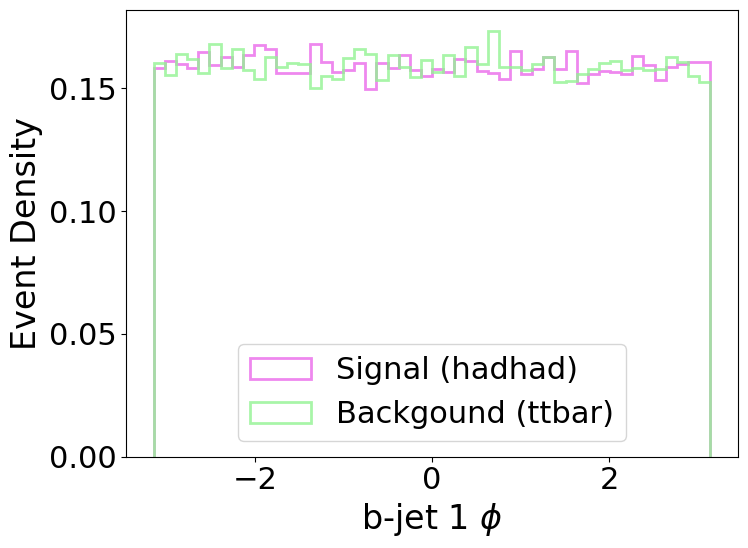

In [66]:
## pT
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((b1_pt_sig ,b1_pt_bkg)), bins=300)[1] #get the bin edges
plt.hist(b1_pt_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(b1_pt_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.xlim(0,750)
plt.xlabel('b-jet 1 $p_T$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/b1_pt.png')
plt.savefig('Saved Figures/Input Variables/b1_pt.pdf')
plt.show()
## Eta
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((b1_eta_sig ,b1_eta_bkg)), bins=50)[1] #get the bin edges
plt.hist(b1_eta_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(b1_eta_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('b-jet 1 $\eta$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/b1_eta.png')
plt.savefig('Saved Figures/Input Variables/b1_eta.pdf')
plt.show()
## Phi
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((b1_phi_sig ,b1_phi_bkg)), bins=50)[1] #get the bin edges
plt.hist(b1_phi_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(b1_phi_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('b-jet 1 $\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/b1_phi.png')
plt.savefig('Saved Figures/Input Variables/b1_phi.pdf')
plt.show()

## b-jet 2

In [54]:
b2_pt_sig = [h[0] for h in b2_sig]
b2_pt_bkg = [h[0] for h in b2_bkg]
b2_eta_sig = [h[1] for h in b2_sig]
b2_eta_bkg = [h[1] for h in b2_bkg]
b2_phi_sig = [h[2] for h in b2_sig]
b2_phi_bkg = [h[2] for h in b2_bkg]

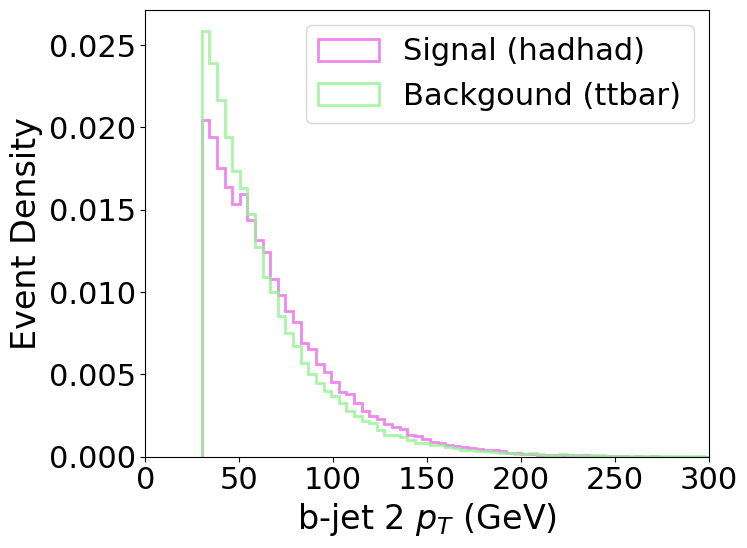

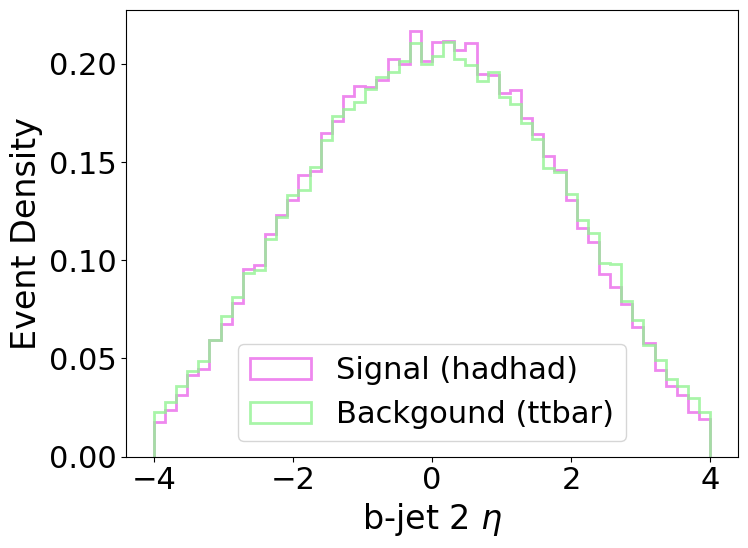

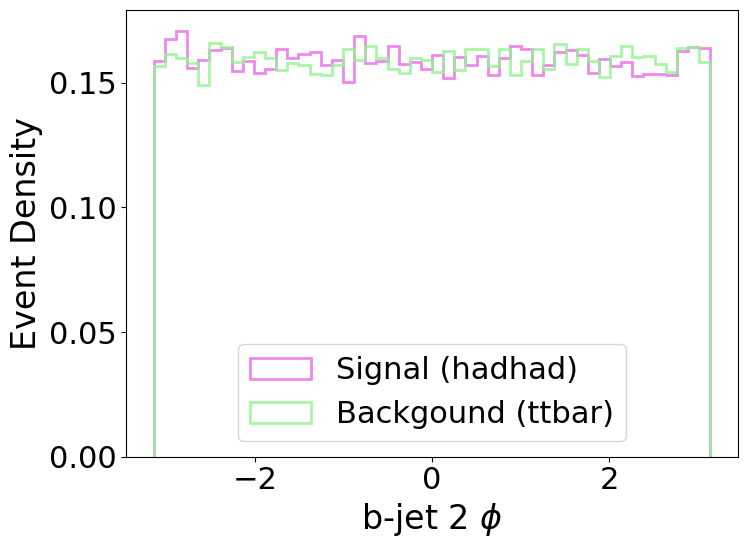

In [67]:
## pT
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((b2_pt_sig ,b2_pt_bkg)), bins=300)[1] #get the bin edges
plt.hist(b2_pt_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(b2_pt_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.xlim(0,300)
plt.xlabel('b-jet 2 $p_T$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/b2_pt.png')
plt.savefig('Saved Figures/Input Variables/b2_pt.pdf')
plt.show()
## Eta
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((b2_eta_sig ,b2_eta_bkg)), bins=50)[1] #get the bin edges
plt.hist(b2_eta_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(b2_eta_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('b-jet 2 $\eta$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/b2_eta.png')
plt.savefig('Saved Figures/Input Variables/b2_eta.pdf')
plt.show()
## Phi
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((b2_phi_sig ,b2_phi_bkg)), bins=50)[1] #get the bin edges
plt.hist(b2_phi_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(b2_phi_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('b-jet 2 $\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/b2_phi.png')
plt.savefig('Saved Figures/Input Variables/b2_phi.pdf')
plt.show()

## Missing Transverse Energy

In [57]:
energy_pt_sig = [h[0] for h in energy_sig]
energy_pt_bkg = [h[0] for h in energy_bkg]
energy_phi_sig = [h[2] for h in energy_sig]
energy_phi_bkg = [h[2] for h in energy_bkg]

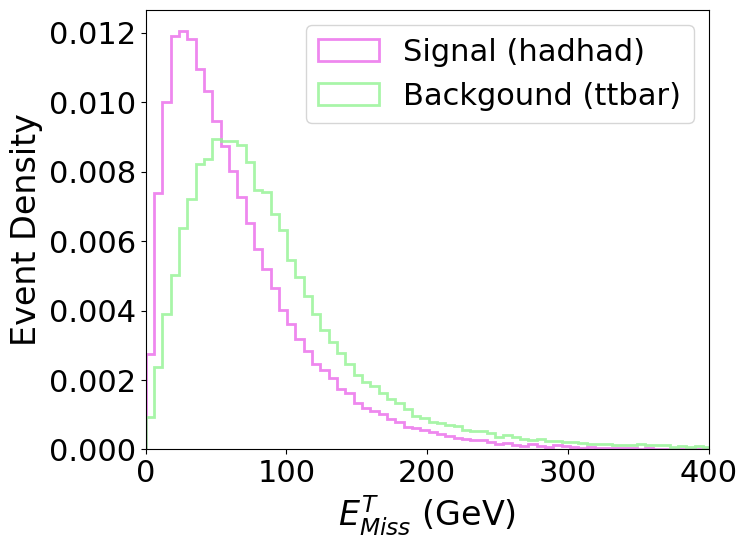

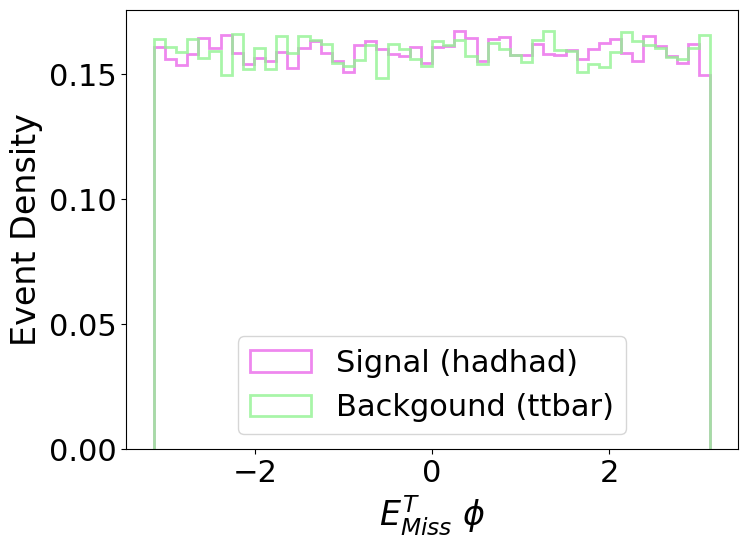

In [68]:
## pT
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((energy_pt_sig ,energy_pt_bkg)), bins=300)[1] #get the bin edges
plt.hist(energy_pt_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(energy_pt_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.xlim(0,400)
plt.xlabel('$E^T_{Miss}$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/energy_pt.png')
plt.savefig('Saved Figures/Input Variables/energy_pt.pdf')
plt.show()
## Phi
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((energy_phi_sig ,energy_phi_bkg)), bins=50)[1] #get the bin edges
plt.hist(energy_phi_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(energy_phi_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('$E^T_{Miss}$ $\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/energy_phi.png')
plt.savefig('Saved Figures/Input Variables/energy_phi.pdf')
plt.show()

## jet3

In [6]:
jet3_pt_sig = [h[0] for h in jet3_sig]
jet3_pt_bkg = [h[0] for h in jet3_bkg]
jet3_eta_sig = [h[1] for h in jet3_sig]
jet3_eta_bkg = [h[1] for h in jet3_bkg]
jet3_phi_sig = [h[2] for h in jet3_sig]
jet3_phi_bkg = [h[2] for h in jet3_bkg]

In [8]:
print(len(jet3_sig)/selected_signal)
print(len(jet3_bkg)/selected_signal)

0.695606521138436
0.7437413650179607


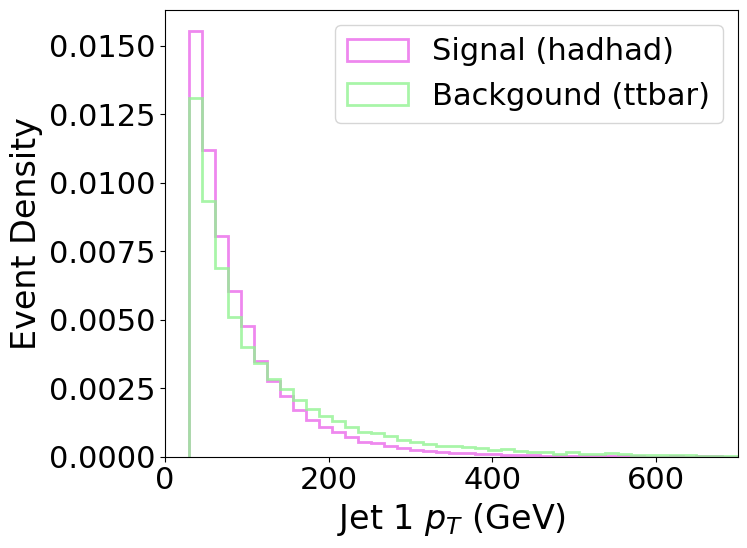

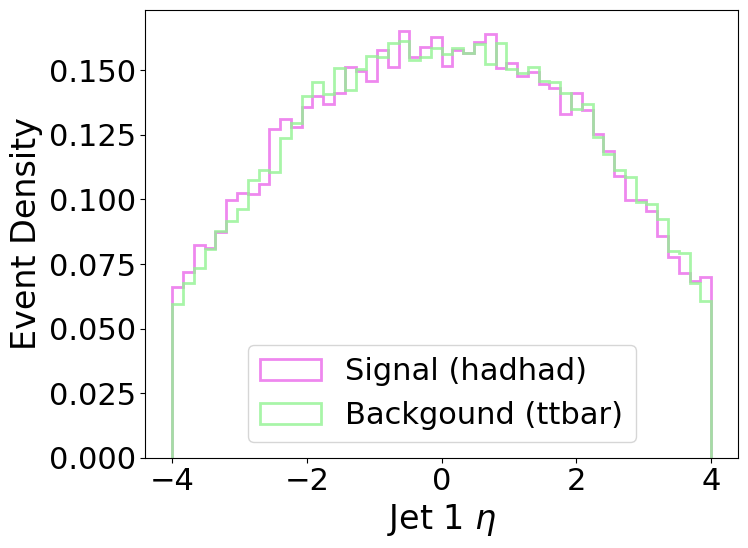

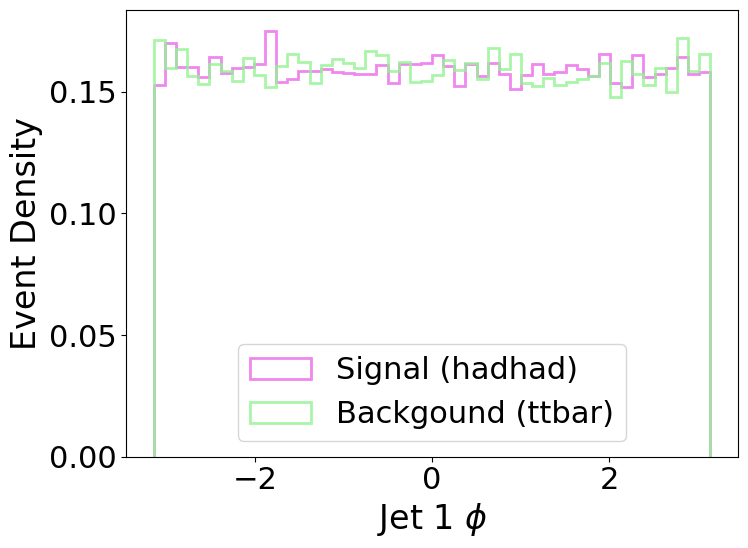

In [71]:
## pT
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((jet3_pt_sig ,jet3_pt_bkg)), bins=200)[1] #get the bin edges
plt.hist(jet3_pt_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(jet3_pt_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.xlim(0,700)
plt.xlabel('Jet 1 $p_T$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/jet1_pt.png')
plt.savefig('Saved Figures/Input Variables/jet1_pt.pdf')
plt.show()
## Eta
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((jet3_eta_sig ,jet3_eta_bkg)), bins=50)[1] #get the bin edges
plt.hist(jet3_eta_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(jet3_eta_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('Jet 1 $\eta$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/jet1_eta.png')
plt.savefig('Saved Figures/Input Variables/jet1_eta.pdf')
plt.show()
## Phi
plt.figure(figsize=(8,6))
bins=np.histogram(np.hstack((jet3_phi_sig ,jet3_phi_bkg)), bins=50)[1] #get the bin edges
plt.hist(jet3_phi_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", label='Signal (hadhad)', density=True, linewidth = 2)
plt.hist(jet3_phi_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", label='Backgound (ttbar)', density=True, linewidth = 2)
plt.ylabel('Event Density')
plt.xlabel('Jet 1 $\phi$')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Input Variables/jet1_phi.png')
plt.savefig('Saved Figures/Input Variables/jet1_phi.pdf')
plt.show()

# Complex Variables

In [17]:
# sorting complex node between signal and background
complex_sig = [g.x[-1] for g in dataset if g.y.item() == 1]
complex_bkg = [g.x[-1] for g in dataset if g.y.item() == 0]

In [31]:
LEGEND_SIZE = 20
SMALL_SIZE = 18
MEDIUM_SIZE = 22
BIGGER_SIZE = 24

plt.figure(figsize=(10, 6))

plt.rc('font', size=BIGGER_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=LEGEND_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)

<Figure size 1000x600 with 0 Axes>

In [11]:
print(complex_sig[0])

tensor([        nan,         nan,         nan,  1.2273e+02,  1.1136e+00,
         7.6174e+01,  7.9294e-01,  1.8855e+02,  1.8472e+01,  4.6433e-01,
         1.2617e+03, -2.9373e+00], dtype=torch.float64)


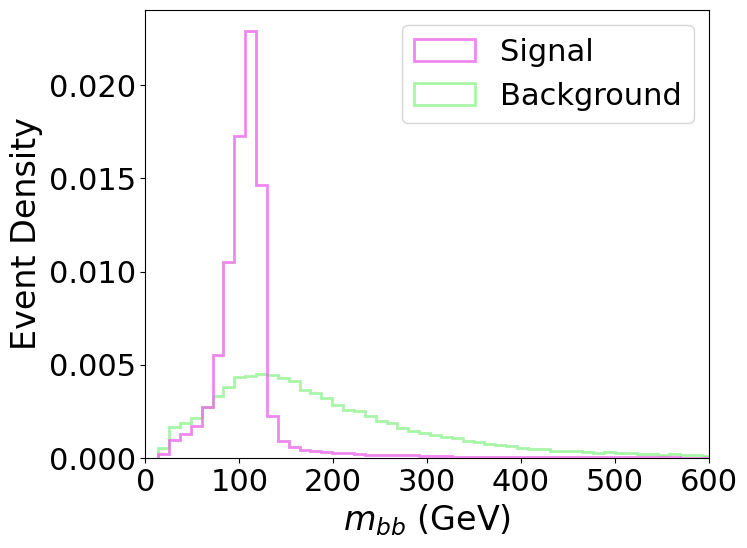

In [59]:
#m_bb
m_bb_sig = [g[3] for g in complex_sig]
m_bb_bkg = [g[3] for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((m_bb_sig ,m_bb_bkg)), bins=400)[1] #get the bin edges
plt.hist(m_bb_sig, bins, color = '#ea6aea',alpha=0.8, density=True, linewidth = 2, histtype='step', label='Signal', zorder=10)
plt.hist(m_bb_bkg, bins, color = '#93f393',alpha=0.8, density=True, linewidth = 2, histtype='step', label='Background')
plt.xlim(0,600)
plt.xlabel('$m_{bb}$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/m_bb.png')
plt.savefig('Saved Figures/Complex Variables/m_bb.pdf')
plt.show()

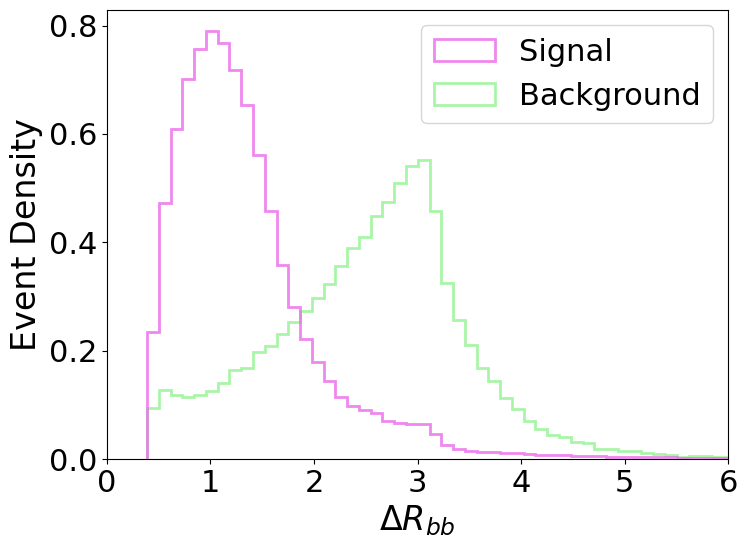

In [60]:
#dR_bb

dR_bb_sig = [g[4].item() for g in complex_sig]
dR_bb_bkg = [g[4].item() for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((dR_bb_sig ,dR_bb_bkg)), bins=70)[1] #get the bin edges
plt.hist(dR_bb_sig, bins, color = '#ea6aea',alpha=0.8, density=True, linewidth = 2, histtype='step', label='Signal', zorder=10)
plt.hist(dR_bb_bkg, bins, color = '#93f393',alpha=0.8, density=True, linewidth = 2, histtype='step', label='Background')
plt.xlim(0,6)
plt.xlabel('$\Delta R_{bb}$')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/dR_bb.png')
plt.savefig('Saved Figures/Complex Variables/dR_bb.pdf')
plt.show()

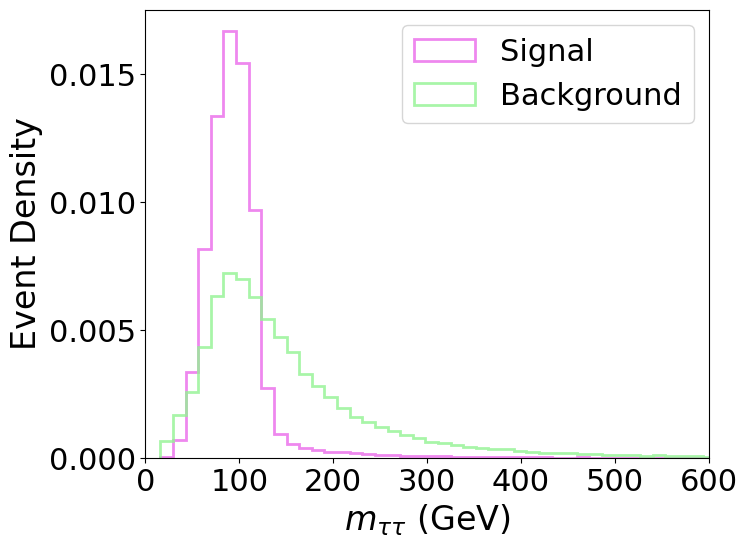

In [67]:
#m_tt

m_tt_sig = [g[5].item() for g in complex_sig]
m_tt_bkg = [g[5].item() for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((m_tt_sig ,m_tt_bkg)), bins=400)[1] #get the bin edges
plt.hist(m_tt_sig, bins, color = '#ea6aea',alpha=0.8, density=True, linewidth = 2, histtype='step', label='Signal')
plt.hist(m_tt_bkg, bins, color = '#93f393',alpha=0.8, density=True, linewidth = 2, histtype='step', label='Background')
plt.xlim(0,600)
plt.xlabel('$m_{ττ}$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/m_tt.png')
plt.savefig('Saved Figures/Complex Variables/m_tt.pdf')
plt.show()

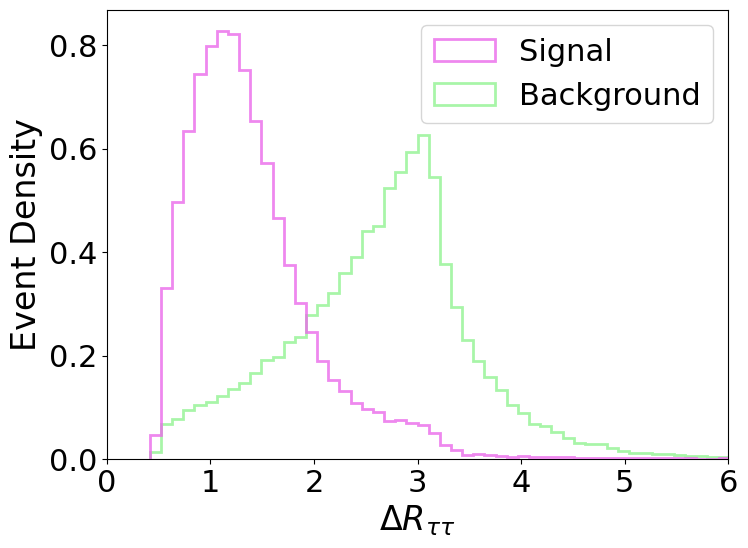

In [61]:
#dR_tt

dR_tt_sig = [g[6].item() for g in complex_sig]
dR_tt_bkg = [g[6].item() for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((dR_tt_sig ,dR_tt_bkg)), bins=70)[1] #get the bin edges
plt.hist(dR_tt_sig, bins, color = '#ea6aea',alpha=0.8, histtype='step', density=True, linewidth = 2, label='Signal', zorder=10)
plt.hist(dR_tt_bkg, bins, color = '#93f393',alpha=0.8, histtype='step', density=True, linewidth = 2, label='Background')
plt.xlim(0,6)
plt.xlabel('$\Delta R_{ττ}$')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/dR_tt.png')
plt.savefig('Saved Figures/Complex Variables/dR_tt.pdf')
plt.show()

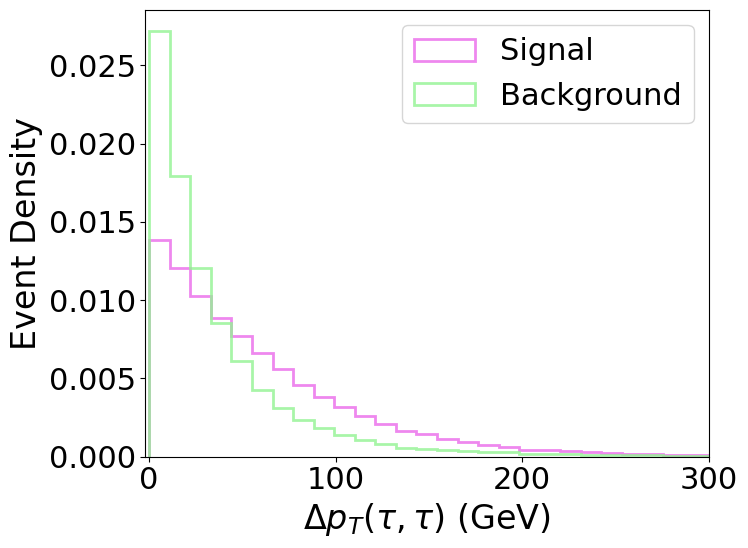

In [69]:
#dpT_tt
dpT_tt_sig = [g[7] for g in complex_sig]
dpT_tt_bkg = [g[7] for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((dpT_tt_sig ,dpT_tt_bkg)), bins=200)[1] #get the bin edges
plt.hist(dpT_tt_sig, bins, color = '#ea6aea',alpha=0.8, histtype='step', density=True, linewidth = 2, label='Signal')
plt.hist(dpT_tt_bkg, bins, color = '#93f393',alpha=0.8, histtype='step', density=True, linewidth = 2, label='Background')
plt.xlim(-2,300)
plt.xlabel('$\Delta p_T(τ,τ)$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/dpT_tt.png')
plt.savefig('Saved Figures/Complex Variables/dpT_tt.pdf')
plt.show()

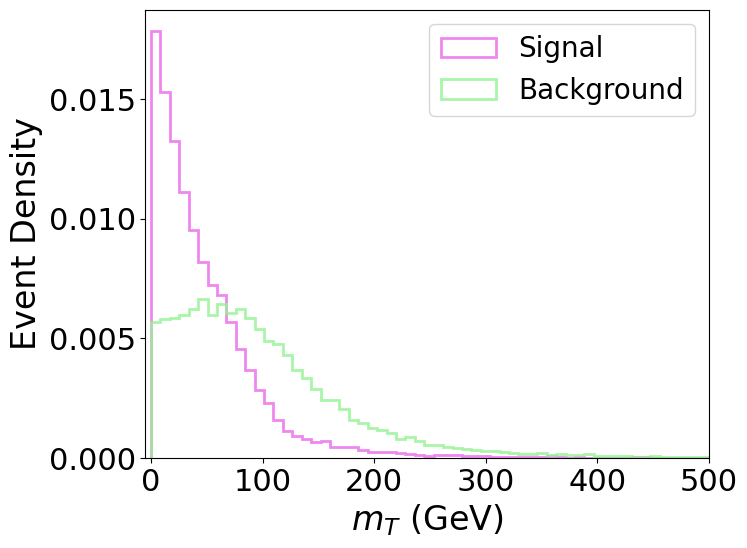

In [36]:
#m_T
m_T_sig = [g[8] for g in complex_sig]
m_T_bkg = [g[8] for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((m_T_sig ,m_T_bkg)), bins=300)[1] #get the bin edges
plt.hist(m_T_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Signal')
plt.hist(m_T_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Background')
plt.xlim(-5,500)
plt.xlabel('$m_{T}$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/m_T.png')
plt.savefig('Saved Figures/Complex Variables/m_T.pdf')
plt.show()

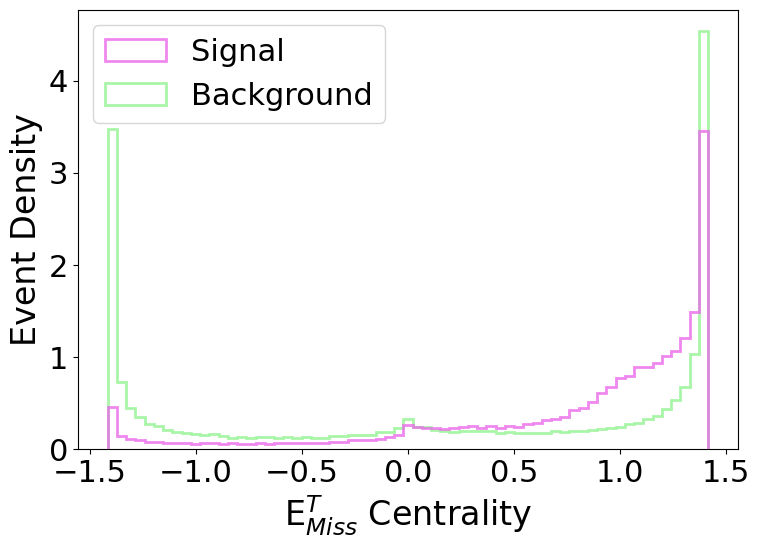

In [45]:
#C_met
C_met_sig = [g[9] for g in complex_sig]
C_met_bkg = [g[9] for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((C_met_sig ,C_met_bkg)), bins=65)[1] #get the bin edges
plt.hist(C_met_sig, bins, color = '#ea6aea',alpha=0.8, histtype='step', density=True, linewidth = 2, label='Signal', zorder=10)
plt.hist(C_met_bkg, bins, color = '#93f393',alpha=0.8, histtype='step', density=True, linewidth = 2, label='Background')
#plt.xlim(-5,10)
plt.xlabel('E$^T_{Miss}$ Centrality')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/C_met.png')
plt.savefig('Saved Figures/Complex Variables/C_met.pdf')
plt.show()

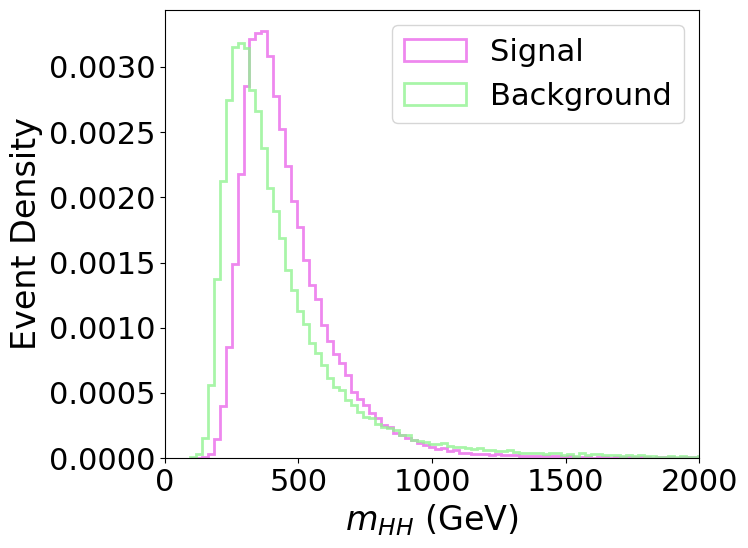

In [64]:
#m_HH
m_HH_sig = [g[10] for g in complex_sig]
m_HH_bkg = [g[10] for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((m_HH_sig ,m_HH_bkg)), bins=500)[1] #get the bin edges
plt.hist(m_HH_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Signal')
plt.hist(m_HH_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Background')
plt.xlim(0,2000)
plt.xlabel('$m_{HH}$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/m_HH.png')
plt.savefig('Saved Figures/Complex Variables/m_HH.pdf')
plt.show()

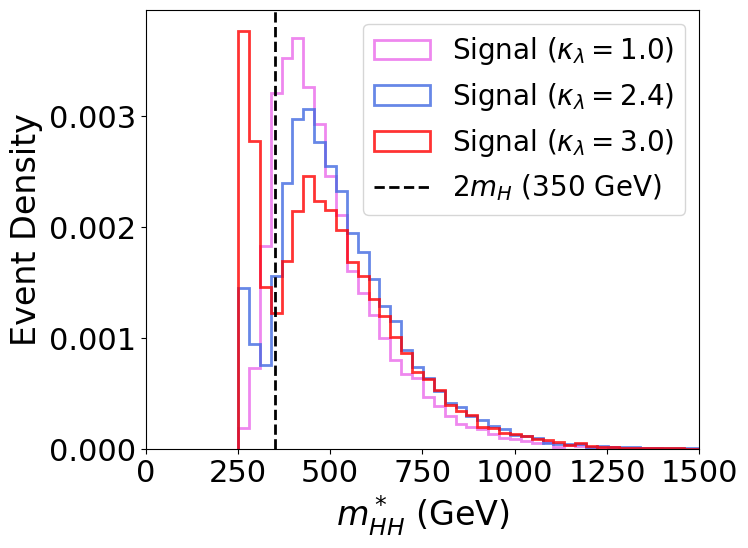

In [39]:
#m_HH*
#mHH - mbb - mtt + 250 GeV

m_HH_sig_100 = [(g[10] - g[3] - g[5] + 250) for g in complex_store_sig_100]
m_HH_sig_240 = [(g[10] - g[3] - g[5] + 250) for g in complex_store_sig_240]
m_HH_sig_300 = [(g[10] - g[3] - g[5] + 250) for g in complex_sig]


#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((m_HH_sig_100, m_HH_sig_240, m_HH_sig_300)), bins=100)[1] 
plt.hist(m_HH_sig_100, bins, color = '#ea6aea',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Signal ($\kappa_\lambda = 1.0$)')
plt.hist(m_HH_sig_240, bins, color = 'royalblue',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Signal ($\kappa_\lambda = 2.4$)')
plt.hist(m_HH_sig_300, bins, color = 'red',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Signal ($\kappa_\lambda = 3.0$)')
plt.axvline(350, linestyle='--', color='black', linewidth= 2, label='$2m_{H}$ (350 GeV)')
#plt.hist(m_HH_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Background')
plt.xlim(0,1500)
plt.xlabel('$m_{HH}^*$ (GeV)')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/m_HH_lambdacomparison.png')
plt.savefig('Saved Figures/Complex Variables/m_HH_lambdacomparison.pdf')
plt.show()

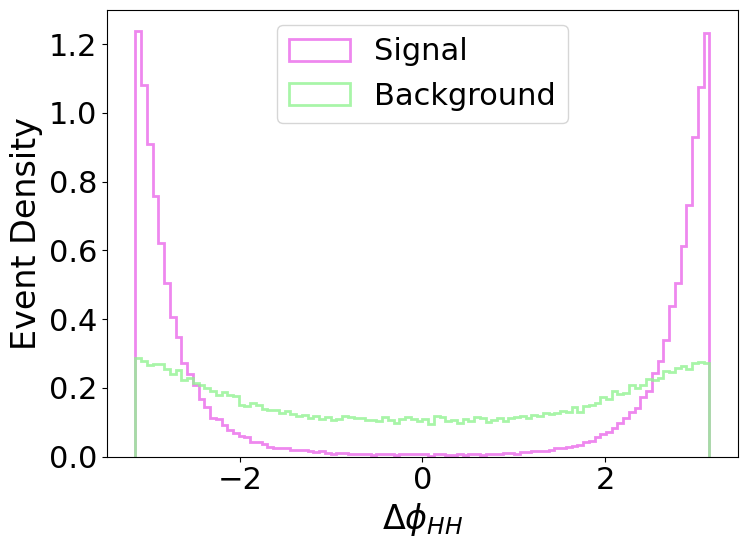

In [66]:
#dPhi_HH
dPhi_HH_sig = [g[11] for g in complex_sig]
dPhi_HH_bkg = [g[11] for g in complex_bkg]

#plotting
plt.figure(figsize=(8, 6))
bins=np.histogram(np.hstack((dPhi_HH_sig ,dPhi_HH_bkg)), bins=100)[1] #get the bin edges
plt.hist(dPhi_HH_sig, bins, color = '#ea6aea',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Signal')
plt.hist(dPhi_HH_bkg, bins, color = '#93f393',alpha=0.8, histtype="step", density=True, linewidth = 2, label='Background')
#plt.xlim(-5,1500)
plt.xlabel('$\Delta\phi_{HH}$')
plt.ylabel('Event Density')
plt.legend()
plt.tight_layout()
plt.savefig('Saved Figures/Complex Variables/dPhi_HH.png')
plt.savefig('Saved Figures/Complex Variables/dPhi_HH.pdf')
plt.show()